In [16]:
import gpxpy
import requests
import polyline

import pandas as pd

import matplotlib.pyplot as plt
import contextily as ctx

import itertools

import xml.dom.minidom
from xml.etree.ElementTree import Element, SubElement, tostring

In [17]:
DEFAULT_RADIUS_IN_METERS = 5

In [21]:
def osrm_format(coords):
    lat, lon = coords
    return f"{lon},{lat}"

def get_route(points):
    points = ';'.join(map(osrm_format, points))
    params = {
        'geometries': 'polyline6',
        'overview': 'full',
    }
    
    response = requests.get(f"http://127.0.0.1:9000/route/v1/foot/{points}", params=params)
    routes = response.json()
    
    if routes['code'] != 'Ok':
        print(routes)
        return None
    
    geometry = routes['routes'][0]['geometry']
    return polyline.decode(geometry, 6)

def plot_route(route, ax):
    latitudes = [point[0] for point in route]
    longitudes = [point[1] for point in route]
    ax.plot(longitudes, latitudes, color='red', label='Route')
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
    ax.legend()
    ax.set_yticks([])
    ax.set_xticks([])
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    
def create_gpx(route, filename):
    gpx = Element('gpx', {
        'creator': 'Evgeny Arbatov',
        'xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
        'xsi:schemaLocation': 'http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd',
        'version': '1.1',
        'xmlns': 'http://www.topografix.com/GPX/1/1'
    })
    trk = SubElement(gpx, "trk")
    trkseg = SubElement(trk, "trkseg")

    for lat, lng in route:
        SubElement(trkseg, "trkpt", attrib={"lat": str(lat), "lon": str(lng)})

    gpx = xml.dom.minidom.parseString(
        tostring(gpx, encoding="unicode")
    ).toprettyxml() 
        
    with open(filename, "w") as f:
        f.write(gpx)

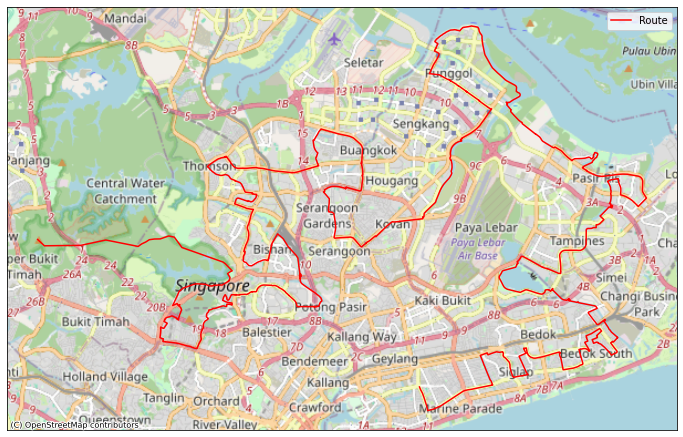

In [24]:
start = (1.3094259512853295, 103.8945520144324)
stop = (1.3551814463295238, 103.77589648110123)

points = [start] + [stop]

osrm_route = get_route(points) 
create_gpx(osrm_route, '../routes/osrm-route.gpx')

fig, ax = plt.subplots(1, 1, figsize=(12, 30))
plot_route(osrm_route, ax)
plt.show()

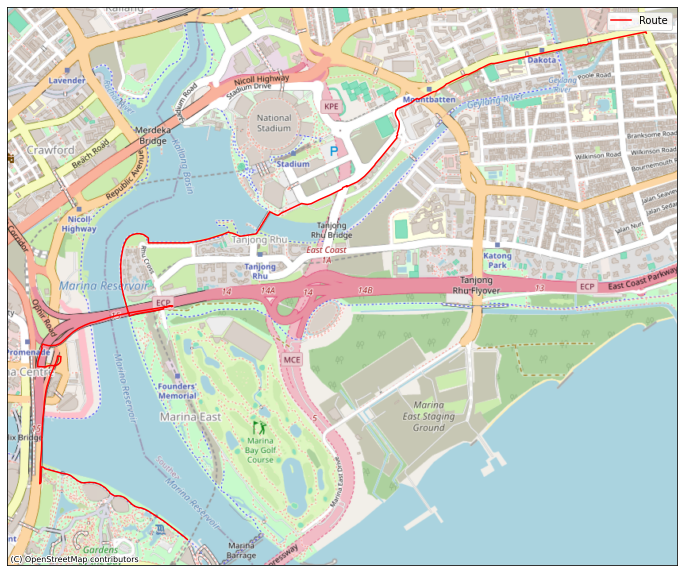

In [25]:
start = (1.3094259512853295, 103.8945520144324)
stop = (1.2820035487927421, 103.86962201102416)

points = [start] + [stop]

osrm_route = get_route(points) 
create_gpx(osrm_route, '../routes/osrm-route.gpx')

fig, ax = plt.subplots(1, 1, figsize=(12, 30))
plot_route(osrm_route, ax)
plt.show()